

# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


I decide to analyze data from the TMDb movie dataset. This data collection includes user reviews and revenue for more than 10,000 films that were gathered from The Movie Database (TMDb). In the dataset, I hope to discover more new patterns.

Coloumns brief description:

id                       A unique identifier for each movie.
imdb_id                  the unique identifier for the movie on the Internet Movie Database (IMDb).
popularity               A measure of the movie's popularity, based on a variety of factors, such as views and ratings.
budget                   The budget of the movie, (maybe in US dollars).
revenue                  The total revenue generated by the movie
original_title           The original title of the movie
cast                     A list of cast members who appeared in the movie.
homepage                 the URL for the movie's official homepage.
director                 the name of the director of the movie.
tagline                  short, catchy phrase or slogan that is associated with the movie.
keywords                 list of keywords or themes that are associated with the movie.
overview                 A brief summary or overview of the movie.
runtime                  The runtime of the movie
genres                   A list of genres that the movie belongs to, such as action, comedy, or drama
production_companies     A list of production companies that were involved in the movie
release_date             The release date of the movie
vote_count               The number of votes that the movie has received on TMDb.
vote_average             The average rating that the movie has received on TMDb, based on the votes.
release_year             The year that the movie was released.
budget_adj               The budget of the movie, adjusted for inflation.
revenue_adj              The total revenue generated by the movie, adjusted for inflation.


### Question(s) for Analysis
 wich properties have better impact compared to other attributes 

### Question(s) to be answred
1- Which genres are most popular from year to year?
2- What kinds of properties are associated with movies that have high revenues?

In [394]:
# import statements for all of the packages that we plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# makes visualisation so nice
import seaborn as sns

#to make sure visualisations pop up in jupyter nb
% matplotlib inline 


In [111]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas


    100% |████████████████████████████████| 9.5MB 2.9MB/s eta 0:00:01  2% |▊                               | 215kB 8.4MB/s eta 0:00:02    10% |███▌                            | 1.0MB 14.4MB/s eta 0:00:01    62% |████████████████████▏           | 6.0MB 22.2MB/s eta 0:00:01    73% |███████████████████████▋        | 7.0MB 20.9MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 16.1MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   20% |██████▌                         | 2.7MB 18.8MB/s eta 0:00:01    27% |████████▊                       | 3.6MB 22.2MB/s eta 0:00:01    34% |███████████▏                    | 4.7MB 19.0MB/s eta 0:00:01    41% |█████████████▍                  | 5.6MB 19.5MB/s eta 0:00:01    48% |███████████████▋                | 6.5MB 19.1MB/s eta 0:00:01    70% |██████████████████████▌         | 9.4MB 20.2MB/s eta 0:00:01    76% |████████████████████████▌       | 10.3MB 20.8MB/s eta 0:00:01    90% |██████████████████████████

<a id='wrangling'></a>
## Data Wrangling






In [395]:
# Loading data and printing out a few lines.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [396]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [397]:
print(df.shape)

(10866, 21)


In [398]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Performing operations to inspect data types and look for instances of missing or possibly errant data.

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

we will check and calculate the number of null values


In [400]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [401]:
# Prcentage of missing data
Miss_data = df.isna().sum()*100/len(df)
Miss_data

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


### Data Cleaning


In [392]:
# After discussing the structure of the data we are going to perform those cleaning steps in the next part of this section.


There is a hight number of missing values which we will not drop or fill their missing data because the entire respective columns will be droped due to their reduced influence in this case in our point of view, except genres and IMDB Coloumns we will drop the rows which caontain the missing value.
even types of release_date column and others will not be corrected because the entire columns will be dropped

In [377]:
# Drop the specified columns
df.drop(columns=['homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'tagline', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)


In [378]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


check null value, there still be more missing values

In [380]:
df.isna().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

In [381]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['genres', 'director', 'cast', 'imdb_id'], inplace=True)


In [382]:
df.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

In [383]:
print(df.shape)

(10727, 12)


Check and delete duplicated rows

In [384]:
sum(df.duplicated())

1

In [385]:
df.drop_duplicates(inplace=True)

In [386]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

we will start to  Investigate the stated question(s) from multiple angles. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year ?

the genres colomn may contain more than one value so we put genres column into a list of individual genres, and then create a new row for each genre in the dataframe. The resulting dataframe will have one row for each movie-genre, with the movie's other attributes.

In [388]:
print(df.genres)

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [391]:
#Split the values in the genres column and create a new dataframe with one row for each genre

# Create an empty list to store the rows of the new dataframe
rows = []

# Iterate over the rows of the original dataframe
for index, row in df.iterrows():
  # Split the values in the `genres` column
  genres = row['genres'].split('|')
  
  # Create a new row for each genre
  for genre in genres:
    new_row = row.copy()
    new_row['genre'] = genre
    rows.append(new_row)

# Create a new dataframe from the list of rows
df_exploded = pd.DataFrame(rows)

# Drop the original `genres` column
df_exploded = df_exploded.drop(columns=['genres'])

In [283]:
print(df_exploded.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'vote_average', 'release_year', 'genre'],
      dtype='object')


In [284]:
print(df_exploded.shape)

(26734, 12)


In [295]:
# groupby release_year and genre and get the greatest value
df_exploded.groupby(['release_year','genre'])['popularity'].mean().groupby(level='release_year').nlargest(1)
# removing extra row index by reseting the index
new_df = df_exploded.groupby(['release_year','genre'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
# change to pandas dataframe from the pandas series
new_df = new_df.reset_index()

In [296]:
new_df.head()

,release_year,genre,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


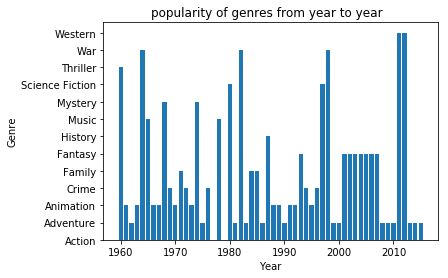

In [304]:
# Create a bar plot to visualize the results
plt.bar(new_df['release_year'], new_df['genre'])
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Popularity of genres from year to year')
plt.show()

In [301]:
new_df.genre.value_counts()

Adventure          14
Animation          11
Fantasy             8
Crime               5
War                 3
Family              3
Music               2
Action              2
Mystery             2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genre, dtype: int64

Conclusion Question 1: There is no strong discernible pattern as to which genre will continue to rule throughout the year. Based on the popularity and the frequency of genre: Adventure, Animation,Fantasy and Crime are the most popular genres from year to year.

### Research Question 2: What kind-s of properties are associated with movies that have high revenues?

In [ ]:
exploring abd investigating the data to address your additional research questions related to properties that are associated with movies that have high revenues?¶.


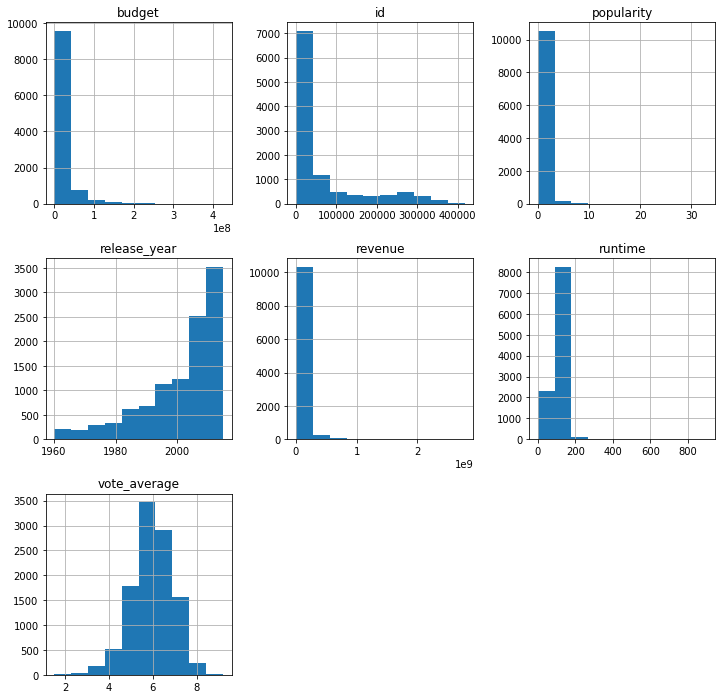

In [307]:
df.hist(figsize = (12, 12));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aca68bb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9ac64e3320>]], dtype=object)

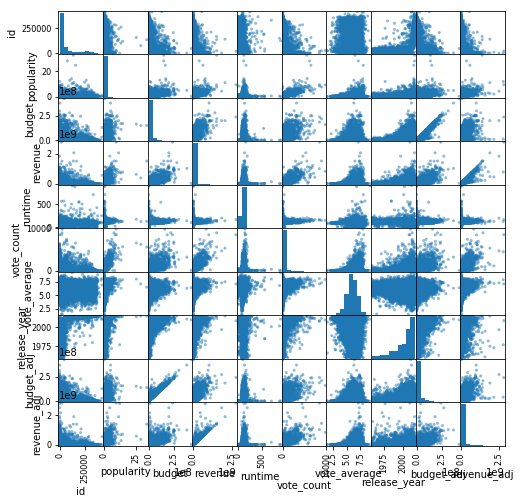

In [13]:
pd.plotting.scatter_matrix(df, figsize=(8,8));

In [ ]:
Plot 1: Popularity vs Revenue

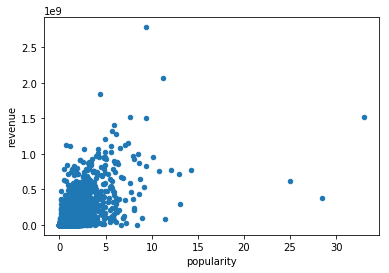

In [15]:
df.plot(x='popularity',y='revenue', kind='scatter')


calculate the correlation to observe the relation between the diffrent properties

In [393]:
# calculate the correlation
df.corr()

,id,popularity,budget,revenue,runtime,vote_average,release_year
id,1.000000,-0.009324,-0.138899,-0.097394,-0.083464,-0.072229,0.510396
popularity,-0.009324,1.000000,0.544214,0.662834,0.138092,0.218182,0.093164
budget,-0.138899,0.544214,1.000000,0.734470,0.191964,0.087604,0.119155
revenue,-0.097394,0.662834,0.734470,1.000000,0.164150,0.178723,0.059176
runtime,-0.083464,0.138092,0.191964,0.164150,1.000000,0.178440,-0.118843
vote_average,-0.072229,0.218182,0.087604,0.178723,0.178440,1.000000,-0.128132
release_year,0.510396,0.093164,0.119155,0.059176,-0.118843,-0.128132,1.000000


In [ ]:
Plot : Popularity vs Revenue

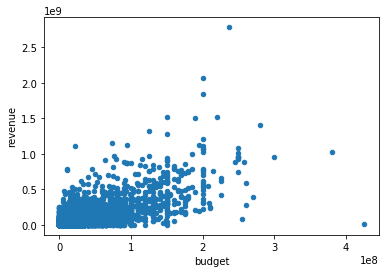

In [330]:
df.plot(x="budget", y="revenue", kind="scatter");

Plot: busget vs Revenue

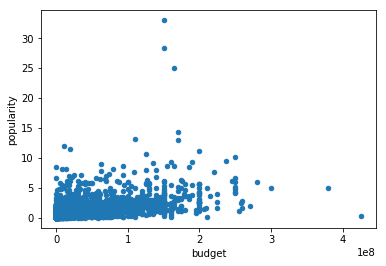

In [332]:
df.plot(x="budget", y="popularity", kind="scatter");

In [ ]:
Plot: pourcwntahe vs budget

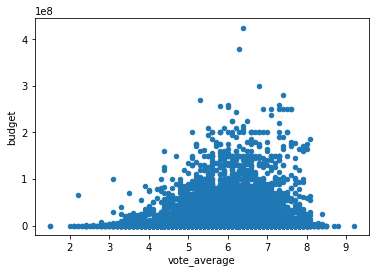

In [333]:
df.plot(x="vote_average", y="budget", kind="scatter");

In [ ]:
Plot: release_year vs budget

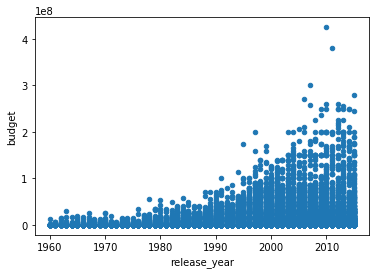

In [334]:
df.plot(x="release_year", y="budget", kind="scatter");

In [ ]:
Plot: release_year vs Revenue

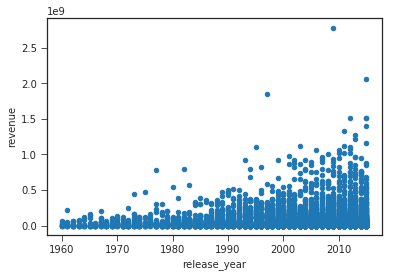

In [365]:
df.plot(x="release_year", y="revenue", kind="scatter");

In [367]:
# sort by highest revenue
df.sort_values(by='revenue', ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,7.3,1997
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,7.3,2012
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015


In [366]:
df.sort_values(by='budget', ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,6.4,2010
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,6.3,2011
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,6.8,2007
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,7.4,2015
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,5.3,2006


<a id='conclusions'></a>
## Conclusions

Limitations: The dataset makes no mention of any currency units. As the most common foreign currency, the dollar is considered in this analysis. and Furthermore,
We performed data wrangling, exploration and visualisation and finnaly got conclusions about our findings.

for Quesstion 1: There is no strong discernible pattern as to which genre will continue to rule throughout the year. Based on the popularity and the frequency of genre: Adventure, Animation,Fantasy and Crime are the most popular genres from year to year.

For Question 2: the strong correlation between attributes or properties indicates most probably that newly released movies have higher budget associated with a higher revenue and higher benefits. which is the answer of the second question 'What kinds of properties are associated with movies that have high revenues?'


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])